In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import ShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.neighbors import KNeighborsClassifier

In [2]:
#create cross validation object
cv = ShuffleSplit(n_splits=10, test_size=0.20, random_state=0)

In [3]:
# Load in merged community college data
url = 'https://github.com/BrownRegaSterlingHeinen/PostsecondaryAttainment/blob/master/2016/Machine%20Learning%20Datasets/NCCCData_ML.csv?raw=true'
NCCCData = pd.read_csv(url)

In [4]:
list(NCCCData)

['AdvESL_MeasureableSkills_Participant_POP_MSG',
 'AdvESL_MeasureableSkills_ParticipServed',
 'AdvESL_MeasureableSkills_AHSGrad',
 'AdvESL_MeasureableSkills_HSE',
 'AdvESL_MeasureableSkills_Postsecondary\r\nEnrollment',
 'AdvESL_MeasureableSkills_MSG',
 'Beg_ESL_PCTProgress',
 'LowBeg_ESL_PCTProgress',
 'HighBeg_ESL_PCTProgress',
 'LowInt_ESL_PCTProgress',
 'HighInt_ESL_PCTProgress',
 'Advanced_ESL_PCTProgress',
 'Basic_Skills_CompletingLevel\r\nLEVEL',
 'Basic_Skills_PCTCompleting',
 'Beg_ABE_Lit_PCTProgress',
 'Beg_BasicEd_PCTProgress',
 'LowInt_BasicEd_PCTProgress',
 'HighInt_BasicEd_PCTProgress',
 'Low_AdultSecondary_Students',
 'Low_AdultSecondary_PCTProgress',
 'BegABELit_Participant_POP_MSG',
 'BegABELit_IndividualsServed',
 'BegABELit_Particip/Served',
 'BegABELit_POPs',
 'BegABELit_AHSGrad',
 'BegABELit_HSE',
 'BegABELit_Postsecondary',
 'BegABELit_Posttest',
 'BegABELit_MSG',
 'BegBasicEd_Participant_POP_MSG',
 'BegBasicEd_Particip/Served',
 'BegBasicEd_AHSGrad',
 'BegBasicEd

In [5]:
#_________________________HAVE TO CHANGE THIS CALCULATION______________________________

#create percentage variables for retention rate
NCCCData['Full_time_rentention_percent']=NCCCData['Full-time retention rate  2016']/10
NCCCData['Part_time_rentention_percent']=NCCCData['Part-time retention rate  2016']/10

In [6]:
#Get the median value of each variable in order to create two groups
cur_median=NCCCData['Curr_Completion_Rate'].median()
first_median=NCCCData['First_Year_Progression'].median()
full_median=NCCCData['Full_time_rentention_percent'].median()
part_median=NCCCData['Part_time_rentention_percent'].median()

#create high and low groups for each variable
NCCCData['Curr_Completion_Rate_TwoGroups']=np.where(NCCCData['Curr_Completion_Rate']<cur_median,"Low","High")
NCCCData['First_Year_Progression_TwoGroups']=np.where(NCCCData['First_Year_Progression']<first_median,"Low","High")
NCCCData['Full_time_rentention_percent_TwoGroups']=np.where(NCCCData['Full_time_rentention_percent']<full_median,"Low","High")
NCCCData['Part_time_rentention_percent_TwoGroups']=np.where(NCCCData['Part_time_rentention_percent']<part_median,"Low","High")

#get the 33rd and 66th percentiles for each variable
cur_33=np.percentile(NCCCData['Curr_Completion_Rate'],33)
cur_66=np.percentile(NCCCData['Curr_Completion_Rate'],66)
first_33=np.percentile(NCCCData['First_Year_Progression'],33)
first_66=np.percentile(NCCCData['First_Year_Progression'],66)
full_33=np.percentile(NCCCData['Full_time_rentention_percent'],33)
full_66=np.percentile(NCCCData['Full_time_rentention_percent'],66)
part_33=np.percentile(NCCCData['Part_time_rentention_percent'],33)
part_66=np.percentile(NCCCData['Part_time_rentention_percent'],66)

#split into three groups
NCCCData['Curr_Completion_Rate_ThreeGroups']=pd.cut(NCCCData['Curr_Completion_Rate'],[0,cur_33,cur_66,np.inf],labels=['low','medium','high'])
NCCCData['First_Year_Progression_ThreeGroups']=pd.cut(NCCCData['First_Year_Progression'],[0,first_33,first_66,np.inf],labels=['low','medium','high'])
NCCCData['Full_time_rentention_percent_ThreeGroups']=pd.cut(NCCCData['Full_time_rentention_percent'],[0,full_33,full_66,np.inf],labels=['low','medium','high'])
NCCCData['Part_time_rentention_percent_ThreeGroups']=pd.cut(NCCCData['Part_time_rentention_percent'],[0,part_33,part_66,np.inf],labels=['low','medium','high'])


In [7]:
#Create data frame of target variables

target_variables=NCCCData[["Curr_Completion_Rate", "First_Year_Progression", "Full_time_rentention_percent", "Part_time_rentention_percent", "Curr_Completion_Rate_ThreeGroups", "First_Year_Progression_ThreeGroups", "Full_time_rentention_percent_ThreeGroups", "Part_time_rentention_percent_ThreeGroups", "Curr_Completion_Rate_TwoGroups", "First_Year_Progression_TwoGroups", "Full_time_rentention_percent_TwoGroups", "Part_time_rentention_percent_TwoGroups"]]


In [9]:
#Remove all the target variables from the data set
target_cols=["Curr_Completion_Rate", "First_Year_Progression", "Full_time_rentention_percent", "Part_time_rentention_percent", "Curr_Completion_Rate_ThreeGroups", "First_Year_Progression_ThreeGroups", "Full_time_rentention_percent_ThreeGroups", "Part_time_rentention_percent_ThreeGroups", "Curr_Completion_Rate_TwoGroups", "First_Year_Progression_TwoGroups", "Full_time_rentention_percent_TwoGroups", "Part_time_rentention_percent_TwoGroups","16-17"]
targets_dropped=NCCCData.drop(target_cols,axis=1)

In [10]:
#check that columns where dropped
list(targets_dropped)

['AdvESL_MeasureableSkills_Participant_POP_MSG',
 'AdvESL_MeasureableSkills_ParticipServed',
 'AdvESL_MeasureableSkills_AHSGrad',
 'AdvESL_MeasureableSkills_HSE',
 'AdvESL_MeasureableSkills_Postsecondary\r\nEnrollment',
 'AdvESL_MeasureableSkills_MSG',
 'Beg_ESL_PCTProgress',
 'LowBeg_ESL_PCTProgress',
 'HighBeg_ESL_PCTProgress',
 'LowInt_ESL_PCTProgress',
 'HighInt_ESL_PCTProgress',
 'Advanced_ESL_PCTProgress',
 'Basic_Skills_CompletingLevel\r\nLEVEL',
 'Basic_Skills_PCTCompleting',
 'Beg_ABE_Lit_PCTProgress',
 'Beg_BasicEd_PCTProgress',
 'LowInt_BasicEd_PCTProgress',
 'HighInt_BasicEd_PCTProgress',
 'Low_AdultSecondary_Students',
 'Low_AdultSecondary_PCTProgress',
 'BegABELit_Participant_POP_MSG',
 'BegABELit_IndividualsServed',
 'BegABELit_Particip/Served',
 'BegABELit_POPs',
 'BegABELit_AHSGrad',
 'BegABELit_HSE',
 'BegABELit_Postsecondary',
 'BegABELit_Posttest',
 'BegABELit_MSG',
 'BegBasicEd_Participant_POP_MSG',
 'BegBasicEd_Particip/Served',
 'BegBasicEd_AHSGrad',
 'BegBasicEd

In [11]:
#Split into train and test data
#Chose 75/25 train/test split
x_train, x_test, y_train, y_test=train_test_split(targets_dropped,target_variables,test_size=0.25, random_state=0)

print("The train data set shape is: ",x_train.shape)
print("The test data set shape is: ",x_test.shape)

The train data set shape is:  (44, 320)
The test data set shape is:  (15, 320)


In [12]:
#logistic regression baseline
log_reg=LogisticRegression().fit(x_train,y_train["First_Year_Progression_TwoGroups"])

print("The mean accuracy on test data is: ", log_reg.score(x_test,y_test["First_Year_Progression_TwoGroups"]))

The mean accuracy on test data is:  0.533333333333


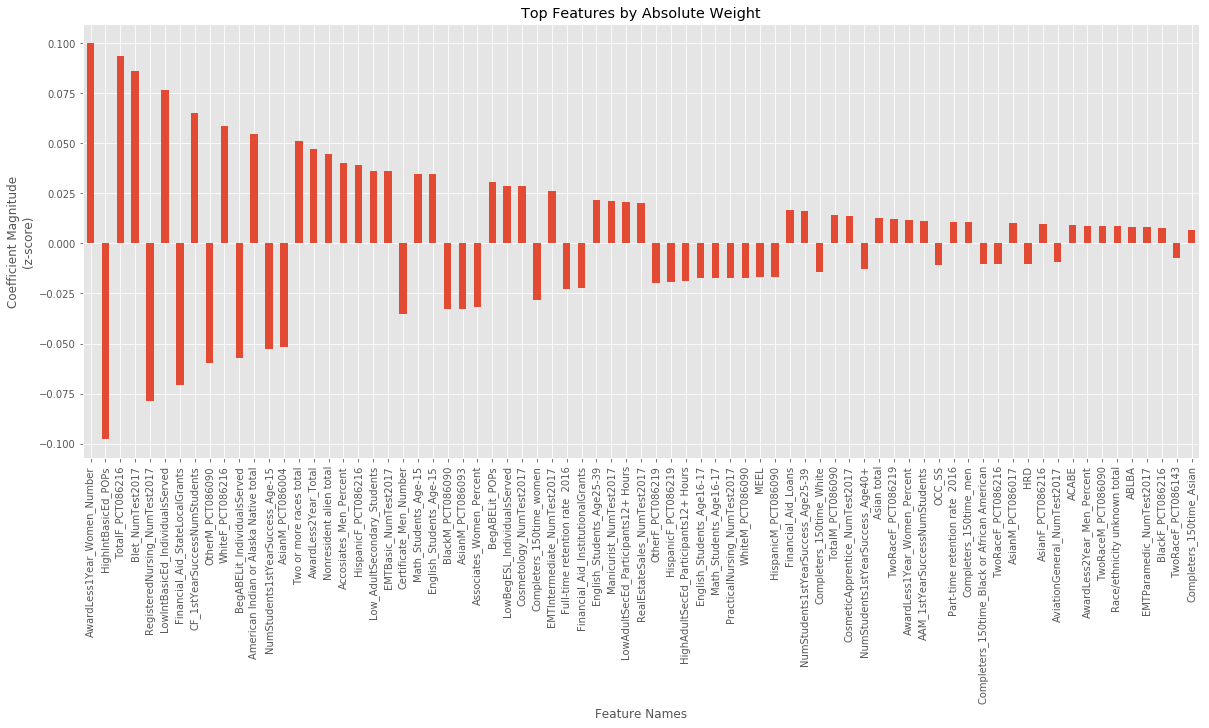

In [13]:
#Load the model's coefficient weights and feature names into a dataframe sorted by weights
weights = log_reg.coef_.ravel()
feature_names = x_train.columns.values
logreg_ft_imp_df = pd.DataFrame({'feature_names':feature_names, 'weights':weights, 'absolute_weights': np.abs(weights)})
logreg_ft_imp_df.sort_values(by='absolute_weights', inplace=True, ascending=False )

# Examine categorical variables of interest  
import matplotlib.pyplot as plt
%matplotlib inline

#Plot the model's feature importances
# REFERENCE:  Eric Larson, https://github.com/eclarson/DataMiningNotebooks
plt.style.use('ggplot')

wt_plt_df = logreg_ft_imp_df.head(75)

weights = pd.Series(wt_plt_df['weights'].values,index=wt_plt_df['feature_names'])
ax = weights.plot(kind='bar', figsize=(20,8))

ax.set_title("Top Features by Absolute Weight")
ax.set_ylabel("Coefficient Magnitude\n(z-score)")
ax.set_xlabel("Feature Names")
plt.show()

In [14]:
#logistic regression PCA
pca = PCA(.95)

pca.fit(x_train)
pca.n_components_

print("In this PCA model, 95% of the variance amounts to", pca.n_components_, "principal components.")

#create model
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)

log_reg_pca = LogisticRegression()
log_reg_pca.fit(x_train_pca, y_train["Curr_Completion_Rate_TwoGroups"])
print("The mean accuracy on test data is: ", log_reg_pca.score(x_test_pca, y_test["First_Year_Progression_TwoGroups"]))

In this PCA model, 95% of the variance amounts to 4 principal components.
The mean accuracy on test data is:  0.6


In [15]:
#logistic regression grid search
log_reg_grid = LogisticRegression()


parameters = { 'penalty':['l2']
              ,'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
              ,'class_weight': ['balanced', 'none']
              ,'random_state': [0]
              ,'solver': ['lbfgs']
              ,'max_iter':[100,500]
             }

#Create a grid search object 
regGridSearch = GridSearchCV(estimator=log_reg_grid
                   , n_jobs=8 # jobs to run in parallel
                   , verbose=1 # low verbosity
                   , param_grid=parameters
                   , cv=cv # KFolds = 10
                   , scoring='accuracy')

regGridSearch.fit(x_train,y_train["First_Year_Progression_TwoGroups"])

Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:  1.5min
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:  1.8min
[Parallel(n_jobs=8)]: Done 280 out of 280 | elapsed:  2.0min finished


GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=0, test_size=0.2, train_size=None),
       error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=8,
       param_grid={'penalty': ['l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'class_weight': ['balanced', 'none'], 'random_state': [0], 'solver': ['lbfgs'], 'max_iter': [100, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [16]:
#Use the best parameters for our model
log_reg_grid = regGridSearch.best_estimator_

print("The mean accuracy on test data is: ", log_reg_grid.score(x_test, y_test["First_Year_Progression_TwoGroups"]))

The mean accuracy on test data is:  0.466666666667


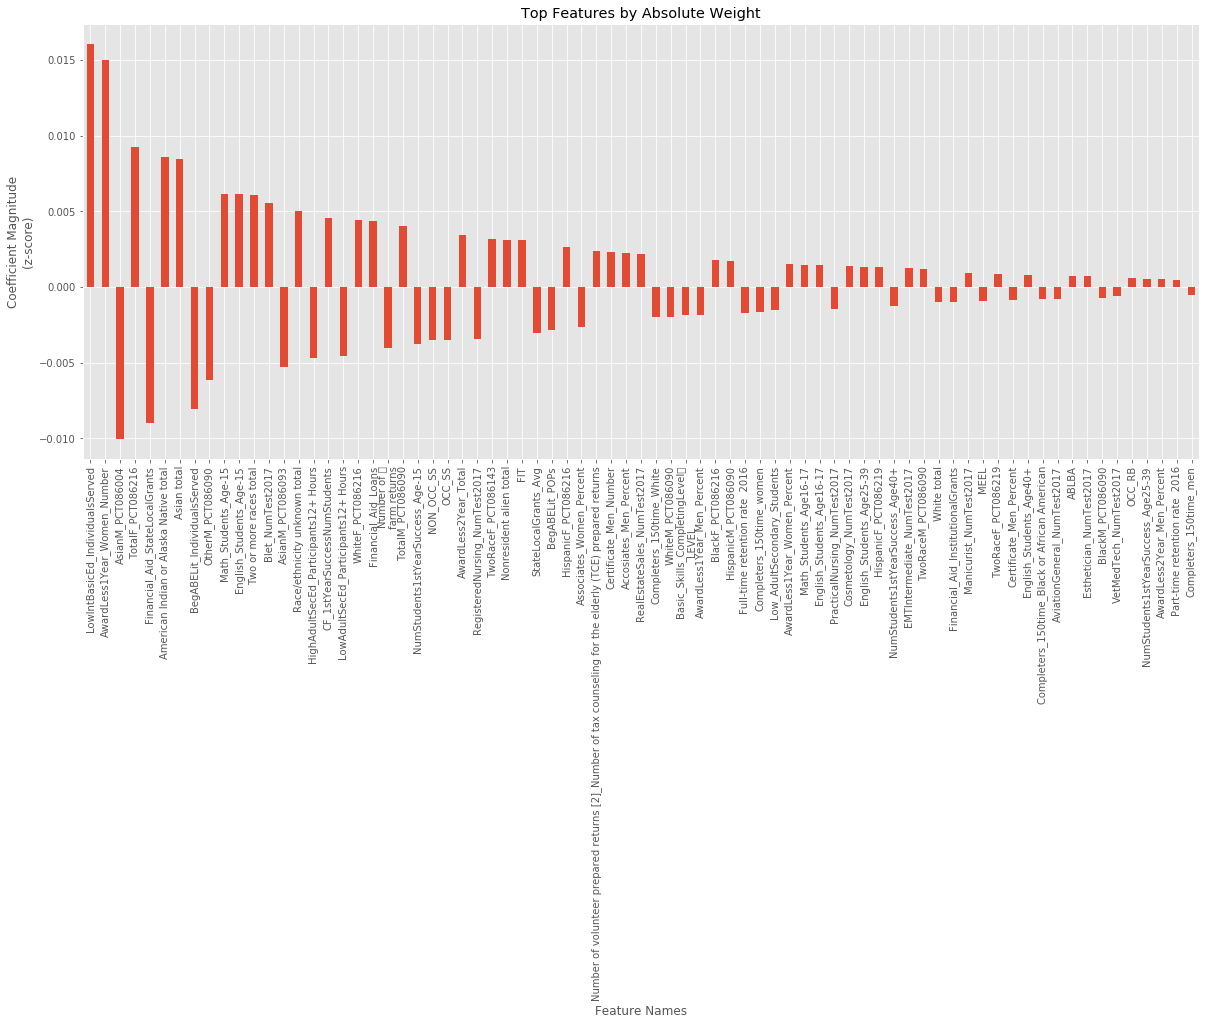

In [17]:
#Load the model's coefficient weights and feature names into a dataframe sorted by weights
weights = log_reg_grid.coef_.ravel()
feature_names = x_train.columns.values
logreggrid_ft_imp_df = pd.DataFrame({'feature_names':feature_names, 'weights':weights, 'absolute_weights': np.abs(weights)})
logreggrid_ft_imp_df.sort_values(by='absolute_weights', inplace=True, ascending=False )

# Examine categorical variables of interest  
import matplotlib.pyplot as plt
%matplotlib inline

#Plot the model's feature importances
# REFERENCE:  Eric Larson, https://github.com/eclarson/DataMiningNotebooks
plt.style.use('ggplot')

wt_plt_df = logreggrid_ft_imp_df.head(75)

weights = pd.Series(wt_plt_df['weights'].values,index=wt_plt_df['feature_names'])
ax = weights.plot(kind='bar', figsize=(20,8))

ax.set_title("Top Features by Absolute Weight")
ax.set_ylabel("Coefficient Magnitude\n(z-score)")
ax.set_xlabel("Feature Names")
plt.show()

In [18]:
#random forest baseline
rf=RandomForestClassifier().fit(x_train,y_train["First_Year_Progression_TwoGroups"])

print("The mean accuracy on test data is: ", rf.score(x_test,y_test["First_Year_Progression_TwoGroups"]))

The mean accuracy on test data is:  0.666666666667


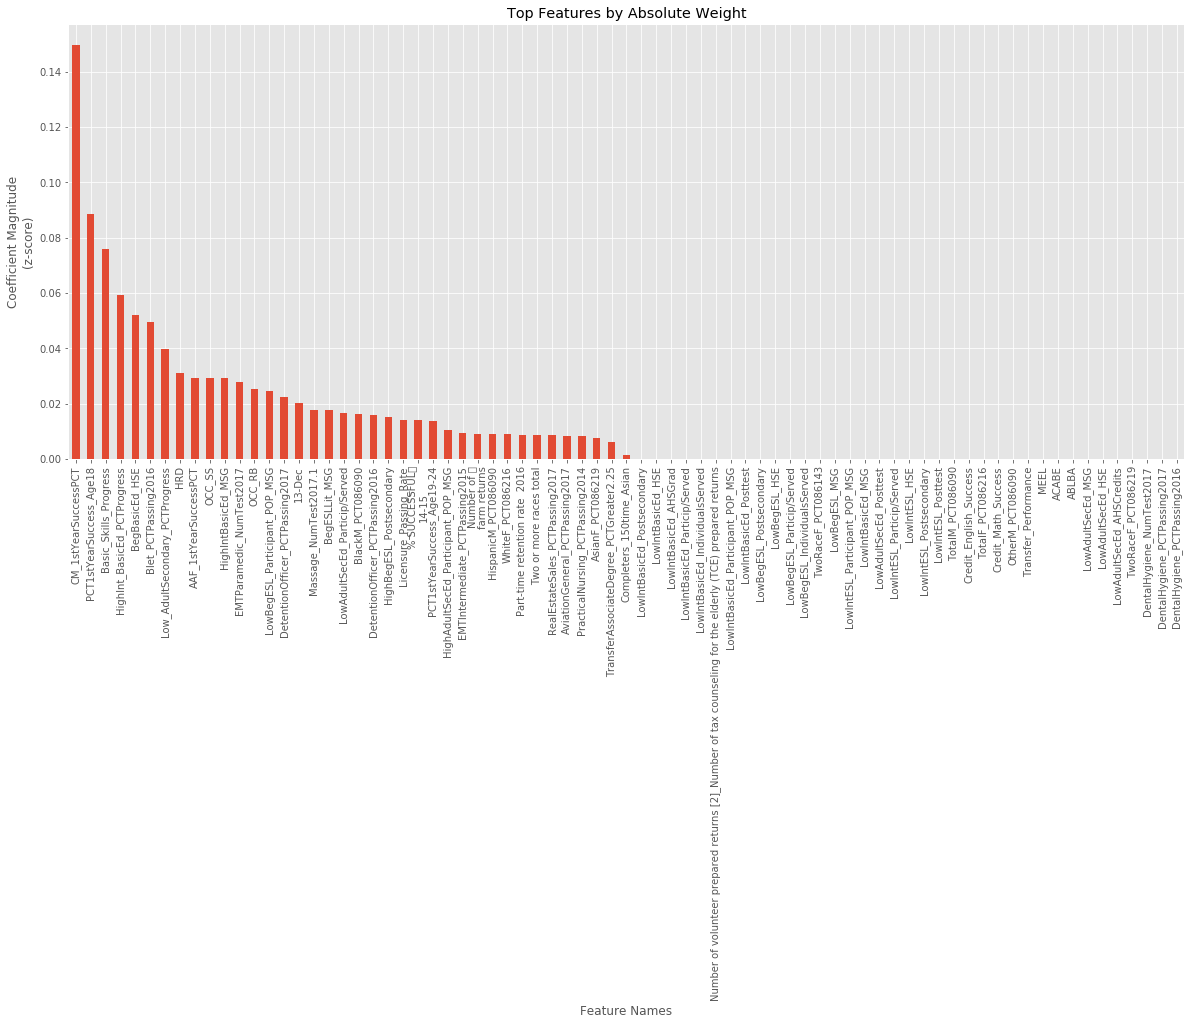

In [19]:
#Load the model's coefficient weights and feature names into a dataframe sorted by weights
weights = rf.feature_importances_
feature_names = x_train.columns.values
rf_ft_imp_df = pd.DataFrame({'feature_names':feature_names, 'weights':weights, 'absolute_weights': np.abs(weights)})
rf_ft_imp_df.sort_values(by='absolute_weights', inplace=True, ascending=False )

# Examine categorical variables of interest  
import matplotlib.pyplot as plt
%matplotlib inline

#Plot the model's feature importances
# REFERENCE:  Eric Larson, https://github.com/eclarson/DataMiningNotebooks
plt.style.use('ggplot')

wt_plt_df = rf_ft_imp_df.head(75)

weights = pd.Series(wt_plt_df['weights'].values,index=wt_plt_df['feature_names'])
ax = weights.plot(kind='bar', figsize=(20,8))

ax.set_title("Top Features by Absolute Weight")
ax.set_ylabel("Coefficient Magnitude\n(z-score)")
ax.set_xlabel("Feature Names")
plt.show()

In [20]:
#random forest grid search
rf_grid=RandomForestClassifier()

parameters = { 'n_estimators': [1,5,10,15,20,25,30,35,40,45,50]
              ,'criterion': ['gini','entropy']
              ,'bootstrap': [True,False]
              }

regGridSearch = GridSearchCV(estimator=rf_grid
                   , n_jobs=8 # jobs to run in parallel
                   , verbose=1 # low verbosity
                   , param_grid=parameters
                   , cv=cv # KFolds = 10
                   , scoring='accuracy')

#Perform hyperparameter search to find the best combination of parameters for our data
regGridSearch.fit(x_train, y_train["First_Year_Progression_TwoGroups"])

Fitting 10 folds for each of 44 candidates, totalling 440 fits


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:  1.4min
[Parallel(n_jobs=8)]: Done 227 tasks      | elapsed:  1.5min
[Parallel(n_jobs=8)]: Done 425 out of 440 | elapsed:  1.5min remaining:    3.2s
[Parallel(n_jobs=8)]: Done 440 out of 440 | elapsed:  1.6min finished


GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=0, test_size=0.2, train_size=None),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=8,
       param_grid={'n_estimators': [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50], 'criterion': ['gini', 'entropy'], 'bootstrap': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [21]:
#Use the best parameters for our model
rf_grid = regGridSearch.best_estimator_

print("The mean accuracy on test data is: ", rf_grid.score(x_test, y_test["First_Year_Progression_TwoGroups"]))

The mean accuracy on test data is:  0.733333333333


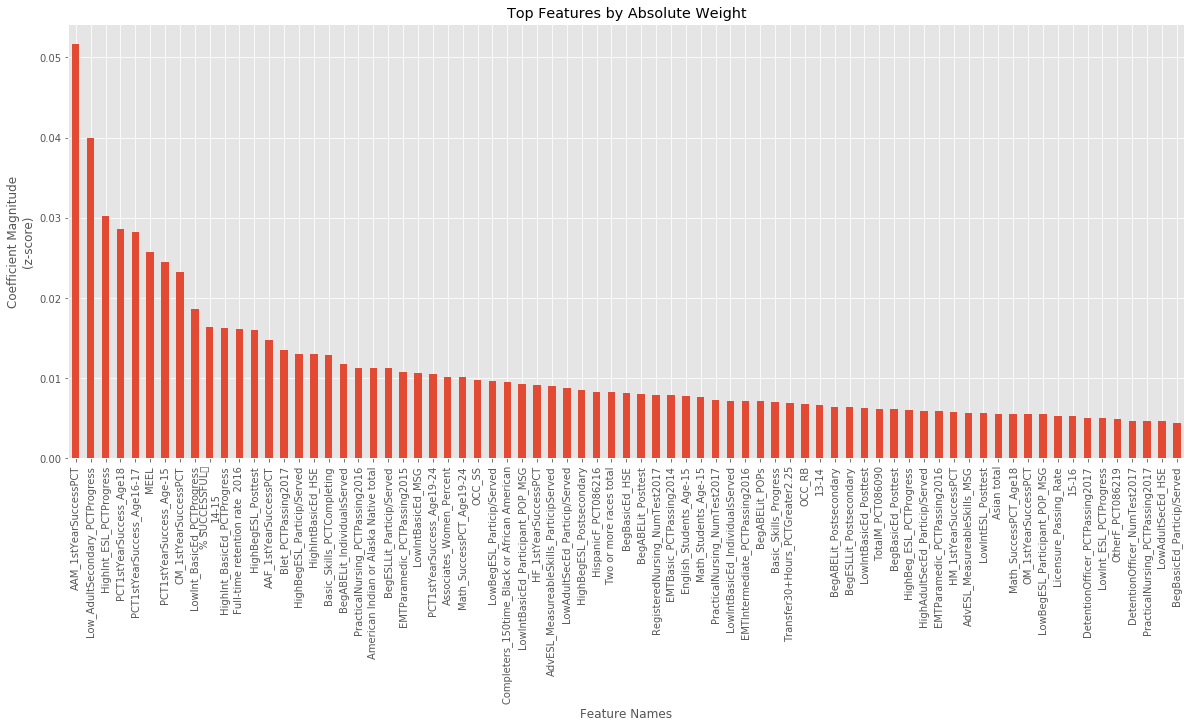

In [22]:
#Load the model's coefficient weights and feature names into a dataframe sorted by weights
weights = rf_grid.feature_importances_
feature_names = x_train.columns.values
rfgrid_ft_imp_df = pd.DataFrame({'feature_names':feature_names, 'weights':weights, 'absolute_weights': np.abs(weights)})
rfgrid_ft_imp_df.sort_values(by='absolute_weights', inplace=True, ascending=False )

# Examine categorical variables of interest  
import matplotlib.pyplot as plt
%matplotlib inline

#Plot the model's feature importances
# REFERENCE:  Eric Larson, https://github.com/eclarson/DataMiningNotebooks
plt.style.use('ggplot')

wt_plt_df = rfgrid_ft_imp_df.head(75)

weights = pd.Series(wt_plt_df['weights'].values,index=wt_plt_df['feature_names'])
ax = weights.plot(kind='bar', figsize=(20,8))

ax.set_title("Top Features by Absolute Weight")
ax.set_ylabel("Coefficient Magnitude\n(z-score)")
ax.set_xlabel("Feature Names")
plt.show()

In [23]:
#decision tree

dt=DecisionTreeClassifier().fit(x_train,y_train["First_Year_Progression_TwoGroups"])

print("The mean accuracy on test data is: ", dt.score(x_test, y_test["First_Year_Progression_TwoGroups"]))

The mean accuracy on test data is:  0.666666666667


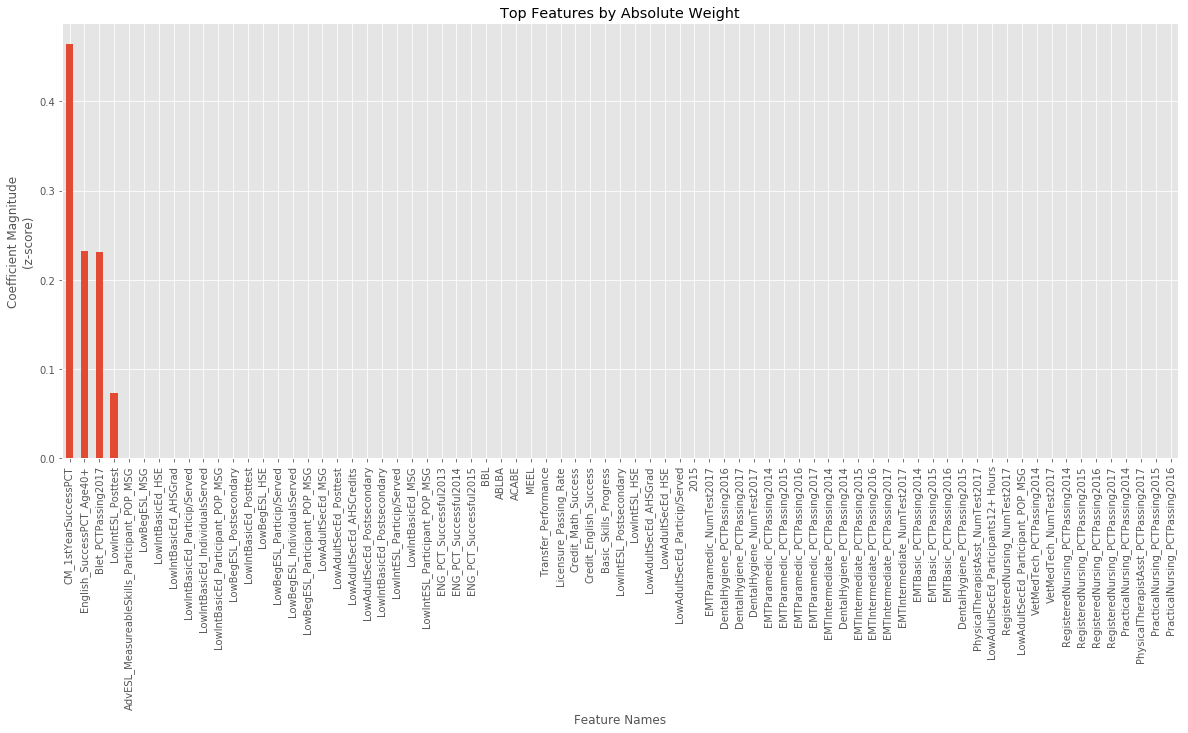

In [24]:
#Load the model's coefficient weights and feature names into a dataframe sorted by weights
weights = dt.feature_importances_
feature_names = x_train.columns.values
dt_ft_imp_df = pd.DataFrame({'feature_names':feature_names, 'weights':weights, 'absolute_weights': np.abs(weights)})
dt_ft_imp_df.sort_values(by='absolute_weights', inplace=True, ascending=False )

# Examine categorical variables of interest  
import matplotlib.pyplot as plt
%matplotlib inline

#Plot the model's feature importances
# REFERENCE:  Eric Larson, https://github.com/eclarson/DataMiningNotebooks
plt.style.use('ggplot')

wt_plt_df = dt_ft_imp_df.head(75)

weights = pd.Series(wt_plt_df['weights'].values,index=wt_plt_df['feature_names'])
ax = weights.plot(kind='bar', figsize=(20,8))

ax.set_title("Top Features by Absolute Weight")
ax.set_ylabel("Coefficient Magnitude\n(z-score)")
ax.set_xlabel("Feature Names")
plt.show()

In [25]:
#Nearest Centroid base line
nc = NearestCentroid().fit(x_train,y_train["First_Year_Progression_TwoGroups"])

print("The mean accuracy on test data is: ", nc.score(x_test, y_test["First_Year_Progression_TwoGroups"]))

The mean accuracy on test data is:  0.6


In [26]:
#Nearest Centroid grid search
nc_grid = NearestCentroid()

parameters = { 'metric': ['euclidean','cosine','manhattan']
              ,'shrink_threshold': [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
              }

regGridSearch = GridSearchCV(estimator=nc_grid
                   , n_jobs=8 # jobs to run in parallel
                   , verbose=1 # low verbosity
                   , param_grid=parameters
                   , cv=cv # KFolds = 10
                   , scoring='accuracy')

#Perform hyperparameter search to find the best combination of parameters for our data
regGridSearch.fit(x_train, y_train["First_Year_Progression_TwoGroups"])


Fitting 10 folds for each of 63 candidates, totalling 630 fits


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:  1.5min
[Parallel(n_jobs=8)]: Done 493 tasks      | elapsed:  1.6min
[Parallel(n_jobs=8)]: Done 630 out of 630 | elapsed:  1.6min finished


GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=0, test_size=0.2, train_size=None),
       error_score='raise',
       estimator=NearestCentroid(metric='euclidean', shrink_threshold=None),
       fit_params=None, iid=True, n_jobs=8,
       param_grid={'metric': ['euclidean', 'cosine', 'manhattan'], 'shrink_threshold': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [27]:
#Use the best parameters for our model
nc_grid = regGridSearch.best_estimator_

print("The mean accuracy on test data is: ", nc_grid.score(x_test, y_test["First_Year_Progression_TwoGroups"]))

The mean accuracy on test data is:  0.6


In [28]:
#k-nearest neighbor grid search
#kn_grid = KNeighborsClassifier()

#parameters = { 'n_neighbors':[1,2,3,4,5,6,7,8,9,10]
#              ,'weights': ['uniform','distance']
#              ,'algorithm': ['auto', 'ball_tree','kd_tree','brute']
#              ,'leaf_size': [1,5,10,15,20,25,30]
#              ,'p':[1,2]
#              ,'metric': ['euclidean','manhattan','chebyshev','minkowski']
#              ,'n_jobs':[1,2,4,6,8]
#             }

#regGridSearch = GridSearchCV(estimator=kn_grid
#                   , n_jobs=8 # jobs to run in parallel
#                   , verbose=1 # low verbosity
#                   , param_grid=parameters
#                   , cv=cv # KFolds = 10
#                   , scoring='accuracy')

#Perform hyperparameter search to find the best combination of parameters for our data
#regGridSearch.fit(x_train, y_train["Curr_Completion_Rate_TwoGroups"])

In [29]:
#Use the best parameters for our model
#kn_grid = regGridSearch.best_estimator_

#print("The mean accuracy on test data is: ", kn_grid.score(x_test, y_test["Curr_Completion_Rate_TwoGroups"]))

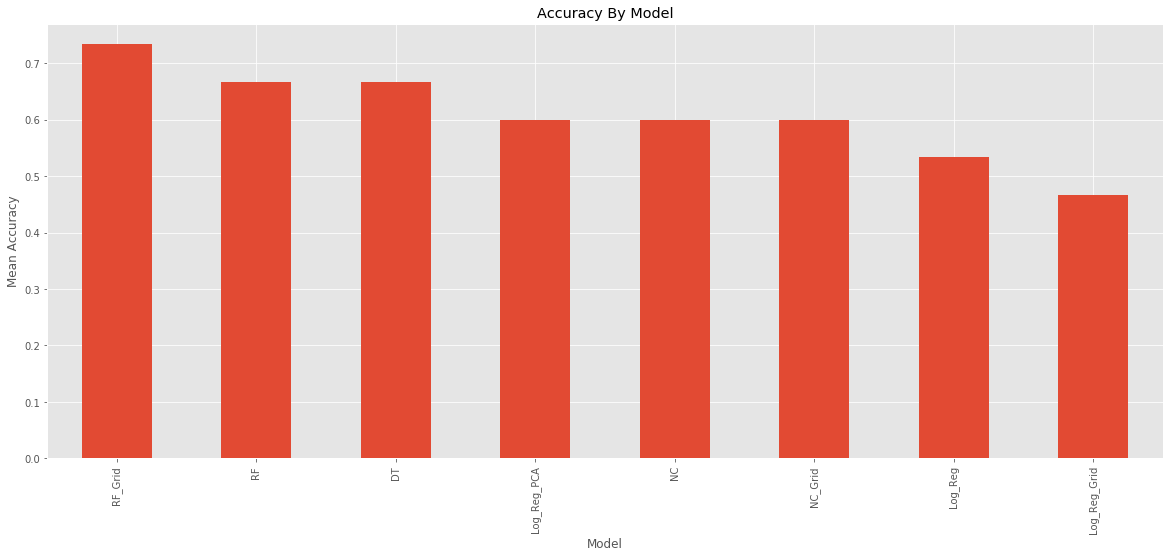

In [30]:
#graph every model's accuracy
log_reg_score=log_reg.score(x_test,y_test["First_Year_Progression_TwoGroups"])

log_reg_pca_score=log_reg_pca.score(x_test_pca, y_test["First_Year_Progression_TwoGroups"])

log_reg_grid_score=log_reg_grid.score(x_test, y_test["First_Year_Progression_TwoGroups"])

rf_score=rf.score(x_test,y_test["First_Year_Progression_TwoGroups"])

rf_grid_score=rf_grid.score(x_test, y_test["First_Year_Progression_TwoGroups"])

dt_score=dt.score(x_test, y_test["First_Year_Progression_TwoGroups"])

nc_score=nc.score(x_test, y_test["First_Year_Progression_TwoGroups"])

nc_grid_score=nc_grid.score(x_test, y_test["First_Year_Progression_TwoGroups"])

scores=pd.DataFrame({"Model":["Log_Reg","Log_Reg_PCA","Log_Reg_Grid","RF","RF_Grid","DT","NC","NC_Grid"]
                     ,"Accuracy":[log_reg_score,log_reg_pca_score,log_reg_grid_score,rf_score,rf_grid_score, dt_score,nc_score,nc_grid_score]})

scores.sort_values(by='Accuracy', inplace=True, ascending=False )

#print(scores)

%matplotlib inline

#Plot the model's feature importances
# REFERENCE:  Eric Larson, https://github.com/eclarson/DataMiningNotebooks
plt.style.use('ggplot')

weights = pd.Series(scores["Accuracy"].values,index=scores["Model"])
ax = weights.plot(kind='bar', figsize=(20,8))

ax.set_title("Accuracy By Model")
ax.set_ylabel("Mean Accuracy")
ax.set_xlabel("Model")
plt.show()